In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from shnitsel.dynamic import (
#     postprocess as P,
#     xrhelpers as xh,
#     pca_biplot as pb,
# )
# from shnitsel.dynamic.plot import dihedral_kde as dk
import shnitsel as sh

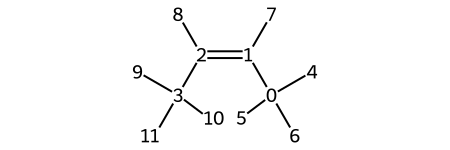

In [2]:
butene = sh.open_frames('/nc/Theo_SHNITSEL/filtered/traj_C4H8_filtered.nc')
sh.plot.show_atom_numbers(butene.atXYZ.isel(frame=0))

So we want the dihedral angle between planes 0-1-2 and 1-2-3.

In [3]:
sh.dihedral(butene.atXYZ, 0, 1, 2, 3)

<xarray.DataArray 'dihedral' (frame: 18833)> Size: 151kB
array([0.03159385, 0.02827137, 0.02495056, ..., 2.37103771, 2.37176175,
       2.36994913], shape=(18833,))
Coordinates:
    atNames  <U1 4B 'C'
  * frame    (frame) object 151kB MultiIndex
  * trajid   (frame) int64 151kB 57 57 57 57 57 57 ... 270 270 270 270 270 270
  * time     (frame) float64 151kB 0.0 0.5 1.0 1.5 ... 148.5 149.0 149.5 150.0
Attributes:
    long_name:  $\varphi_{0,1,2,3}$

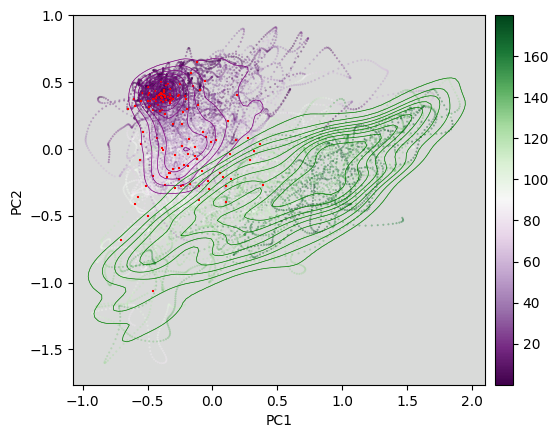

In [6]:
def figax(ax=None):
    if ax is None:
        return plt.subplots(1, 1)
    else:
        return ax.figure, ax

def plot_noodle_dihedral(noodle, hops, dihedrals, ax=None):
    return sh.plot.plot_noodleplot(
        noodle, hops, c=dihedrals, cmap='PRGn', hops_kws=dict(c='r', marker='+', s=2), ax=ax)

def calc_and_plot(frames, i, j, k, l, ax=None):
    fig, ax = figax(ax)
    noodle, hops = P.pca_and_hops(frames)
    dihedrals = P.dihedral(frames['atXYZ'], i, j, k, l) * 180 / np.pi
    ax = plot_noodle_dihedral(noodle, hops, dihedrals, ax=ax)

kde_data = dk.fit_and_eval_kdes(butene, 0,1,2,3, fineness=100)
dk.plot_kdes(*kde_data, levels=10)
calc_and_plot(butene, 0, 1, 2, 3, ax=plt.gca())

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


(array([[-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        ...,
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442]], shape=(100, 100)),
 array([[-1.76442702, -1.76442702, -1.76442702, ..., -1.76442702,
         -1.76442702, -1.76442702],
        [-1.73649151, -1.73649151, -1.73649151, ..., -1.73649151,
         -1.73649151, -1.73649151],
        [-1.70855601, -1.70855601, -1.70855601, ..., -1.70855601,
         -1.70855601, -1.70855601],
        ...,
        [ 0.94531678,  0.94531678,  

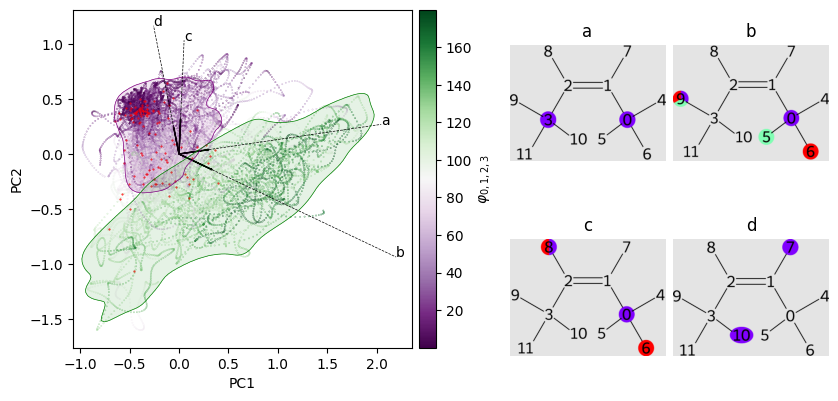

In [4]:
sh.plot.biplot_kde(butene, 0,1,2,3, scatter_color='geo')

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


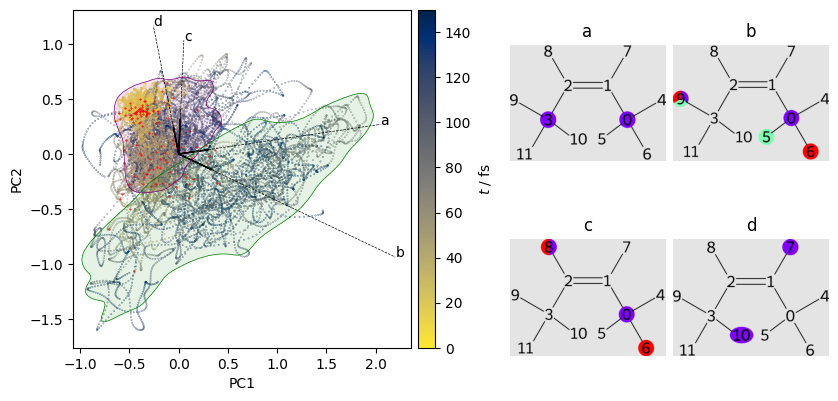

In [7]:
kde_data = dk.biplot_dihedral_time(frames=butene)

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


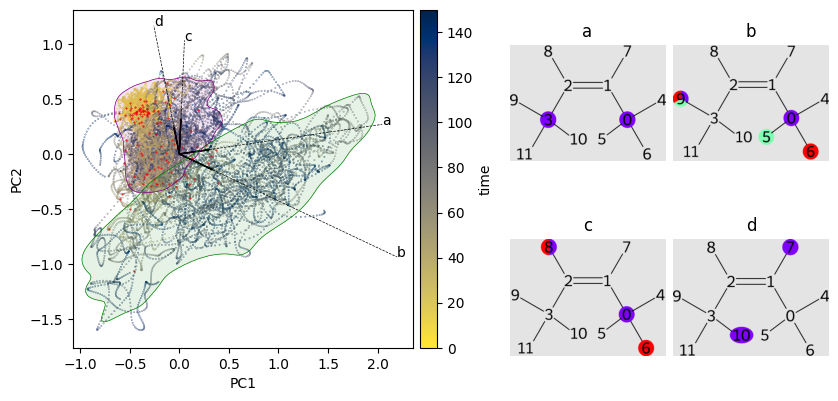

In [6]:
kde_data = sh.plot.biplot_kde(butene, 0,1,2,3)

cis   99.51801949830144 %
trans 98.8170563961475 %


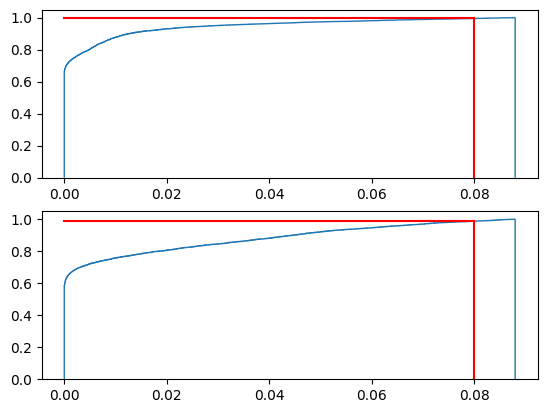

In [13]:
fig, axs = plt.subplots(2,1)
Zcis, Ztrans = kde_data[2]
print('cis  ', sh.plot.plot_cdf_for_kde(Zcis.ravel(), 0.08, ax=axs[0])*100, '%')
print('trans', sh.plot.plot_cdf_for_kde(Ztrans.ravel(), 0.08, ax=axs[1])*100, '%')

## KDE for distance

In [10]:
from shnitsel.dynamic.plot import distance_kde as rk

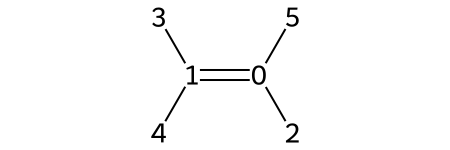

In [14]:
ethene = sh.open_frames('/nc/SHNITSEL_databases/dynamic/A01_ethene_dynamic.nc')
sh.plot.show_atom_numbers(ethene.atXYZ.isel(frame=0))

sweeping clock from -30°
swept to -50°
sweeping anti from 30°
swept to 90°
Less than 4 directions found, procedure repeated with another binning.
sweeping clock from -25°
swept to -45°
sweeping anti from 25°
swept to 45°
sweeping clock from -45°


(array([[-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        ...,
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019]], shape=(100, 100)),
 array([[-0.87500604, -0.87500604, -0.87500604, ..., -0.87500604,
         -0.87500604, -0.87500604],
        [-0.8558255 , -0.8558255 , -0.8558255 , ..., -0.8558255 ,
         -0.8558255 , -0.8558255 ],
        [-0.83664496, -0.83664496, -0.83664496, ..., -0.83664496,
         -0.83664496, -0.83664496],
        ...,
        [ 0.98550644,  0.98550644,  

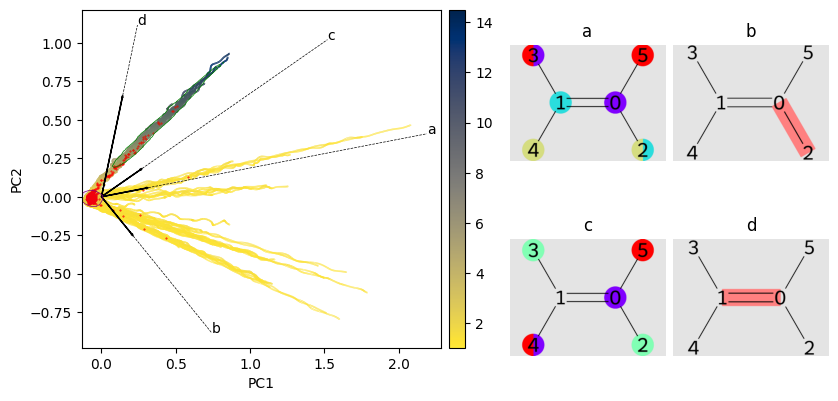

In [14]:
rk.biplot_distance(ethene, 0, 1)

sweeping clock from -30°
swept to -50°
sweeping anti from 30°
swept to 90°
Less than 4 directions found, procedure repeated with another binning.
sweeping clock from -25°
swept to -45°
sweeping anti from 25°
swept to 45°
sweeping clock from -45°


(array([[-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        ...,
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019]], shape=(100, 100)),
 array([[-0.87500604, -0.87500604, -0.87500604, ..., -0.87500604,
         -0.87500604, -0.87500604],
        [-0.8558255 , -0.8558255 , -0.8558255 , ..., -0.8558255 ,
         -0.8558255 , -0.8558255 ],
        [-0.83664496, -0.83664496, -0.83664496, ..., -0.83664496,
         -0.83664496, -0.83664496],
        ...,
        [ 0.98550644,  0.98550644,  

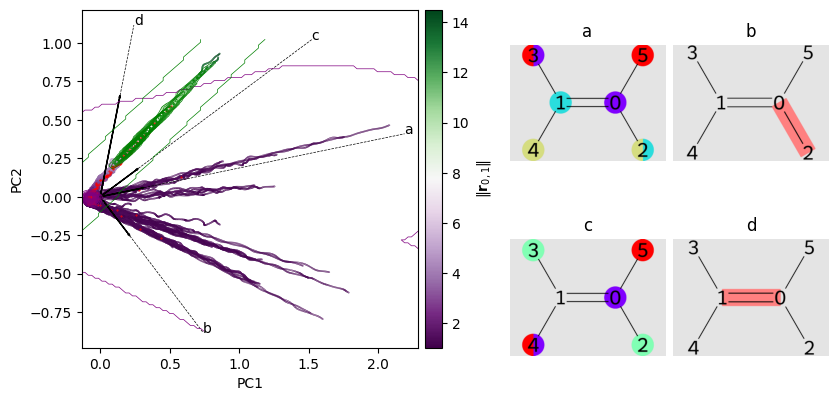

In [28]:
sh.plot.biplot_kde(ethene, 0, 1, scatter_color='geo', levels=20, fill=False)

sweeping clock from -30°
swept to -50°
sweeping anti from 30°
swept to 90°
Less than 4 directions found, procedure repeated with another binning.
sweeping clock from -25°
swept to -45°
sweeping anti from 25°
swept to 45°
sweeping clock from -45°


(array([[-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        ...,
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019],
        [-0.13428676, -0.10982336, -0.08535996, ...,  2.23866339,
          2.26312679,  2.28759019]], shape=(100, 100)),
 array([[-0.87500604, -0.87500604, -0.87500604, ..., -0.87500604,
         -0.87500604, -0.87500604],
        [-0.8558255 , -0.8558255 , -0.8558255 , ..., -0.8558255 ,
         -0.8558255 , -0.8558255 ],
        [-0.83664496, -0.83664496, -0.83664496, ..., -0.83664496,
         -0.83664496, -0.83664496],
        ...,
        [ 0.98550644,  0.98550644,  

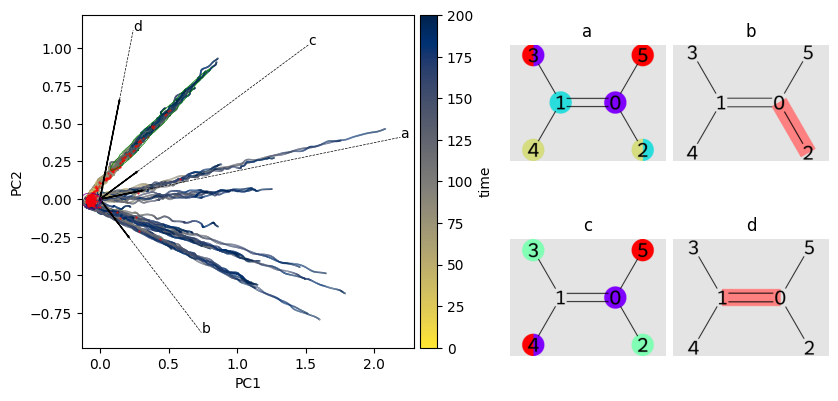

In [18]:
sh.plot.biplot_kde(ethene, 0, 1, scatter_color='time')

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


(array([[-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        ...,
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442],
        [-1.074     , -1.04200288, -1.01000577, ...,  2.02972019,
          2.0617173 ,  2.09371442]], shape=(100, 100)),
 array([[-1.76442702, -1.76442702, -1.76442702, ..., -1.76442702,
         -1.76442702, -1.76442702],
        [-1.73649151, -1.73649151, -1.73649151, ..., -1.73649151,
         -1.73649151, -1.73649151],
        [-1.70855601, -1.70855601, -1.70855601, ..., -1.70855601,
         -1.70855601, -1.70855601],
        ...,
        [ 0.94531678,  0.94531678,  

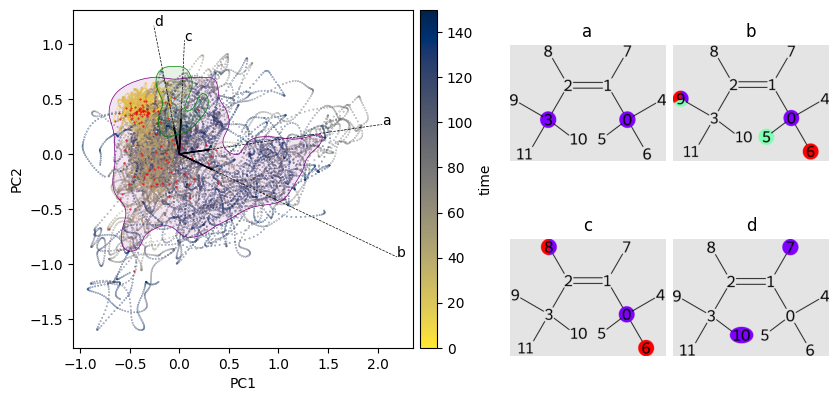

In [16]:
sh.plot.biplot_kde(butene, at1=1, at2=2, geo_filter=[[0,2], [2, 5]])